In [1]:
%load_ext autoreload
%autoreload 2

In [16]:
import numpy as np

import sys
import os

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
patch_dir = '/oasis/projects/nsf/csd395/yuncong/CSHL_data_patches/'

In [22]:
stack = 'MD589'

first_wholeStack, last_wholeStack = section_range_lookup[stack]
print first_wholeStack, last_wholeStack

first, last = (first_wholeStack, last_wholeStack)

prediction_maps = {}

for i in range(first, last+1):
    
    fn = '/oasis/projects/nsf/csd395/yuncong/CSHL_labelMapsLossless/%(stack)s/%(stack)s_%(slice)04d_labelMapLossless.npz' % \
            {'stack': stack, 'slice': i}
    if os.path.exists(fn):
        prediction_maps[i] = np.load(fn)['arr_0'][::8, ::8].copy()

93 368
/oasis/projects/nsf/csd395/yuncong/CSHL_labelMapsLossless/MD589/MD589_0093_labelMapLossless.npz
/oasis/projects/nsf/csd395/yuncong/CSHL_labelMapsLossless/MD589/MD589_0094_labelMapLossless.npz
/oasis/projects/nsf/csd395/yuncong/CSHL_labelMapsLossless/MD589/MD589_0095_labelMapLossless.npz
/oasis/projects/nsf/csd395/yuncong/CSHL_labelMapsLossless/MD589/MD589_0096_labelMapLossless.npz
/oasis/projects/nsf/csd395/yuncong/CSHL_labelMapsLossless/MD589/MD589_0097_labelMapLossless.npz
/oasis/projects/nsf/csd395/yuncong/CSHL_labelMapsLossless/MD589/MD589_0098_labelMapLossless.npz
/oasis/projects/nsf/csd395/yuncong/CSHL_labelMapsLossless/MD589/MD589_0099_labelMapLossless.npz
/oasis/projects/nsf/csd395/yuncong/CSHL_labelMapsLossless/MD589/MD589_0100_labelMapLossless.npz
/oasis/projects/nsf/csd395/yuncong/CSHL_labelMapsLossless/MD589/MD589_0101_labelMapLossless.npz
/oasis/projects/nsf/csd395/yuncong/CSHL_labelMapsLossless/MD589/MD589_0102_labelMapLossless.npz
/oasis/projects/nsf/csd395/yuncon

In [38]:
# stack = 'MD589'
stack = 'MD594'

first_wholeStack, last_wholeStack = section_range_lookup[stack]
print first_wholeStack, last_wholeStack

first, last = (157, 166)

prediction_maps = {}

for i in range(first, last+1):
    prediction_maps[i] = np.load(patch_dir + '/%(stack)s_roi1_densePredictionMapsLossless/%(stack)s_%(slice)04d_roi1_denseTopPredictionMapLossless_margin0.20.npz' \
        % {'stack': stack, 'slice': i})['arr_0'][::8, ::8].copy()

93 364


In [39]:
section_thickness = 20 # in um
xy_pixel_distance_lossless = 0.46
xy_pixel_distance_tb = xy_pixel_distance_lossless * 32 # in um, thumbnail
xy_pixel_distance = xy_pixel_distance_lossless * 8

factor = section_thickness/xy_pixel_distance

n_sec = last_wholeStack + 1 - first_wholeStack

In [40]:
labels = ['BackG', '5N', '7n', '7N', '12N', 'Gr', 'LVe', 'Pn', 'SuVe', 'VLL']
label_dict = dict([(l,i) for i, l in enumerate(labels)])

# colors = (np.loadtxt(os.environ['REPO_DIR'] + '/visualization/100colors.txt')*255).astype(np.uint8)
# colors[label_dict['BackG']] = 255

In [41]:
dm = DataManager(stack=stack, load_mask=False)
volume = np.zeros((dm.image_height/8, dm.image_width/8, int(n_sec*factor)), np.int8)
print volume.shape

(1448, 1804, 1478)


In [42]:
for sec, pred_map in prediction_maps.iteritems():
    volume[:, :, int(factor*sec): int(factor*(sec+1))] = pred_map[..., np.newaxis]

/oasis/projects/nsf/csd181/yuncong/virtualenv-1.9.1/yuncongve/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


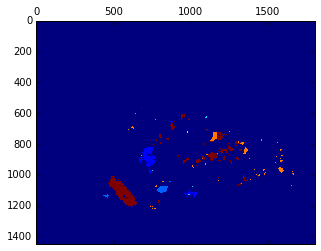

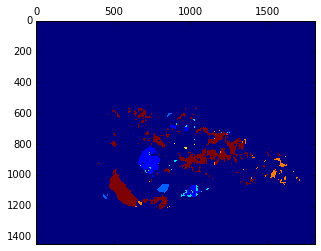

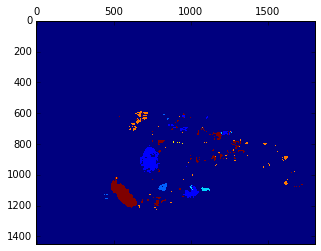

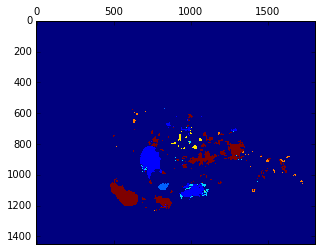

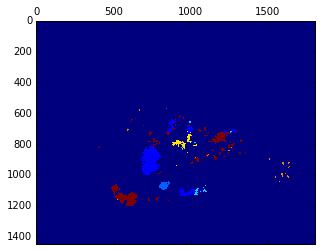

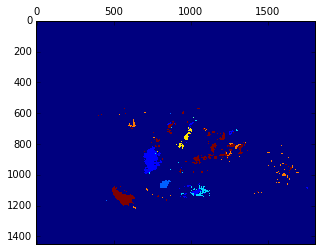

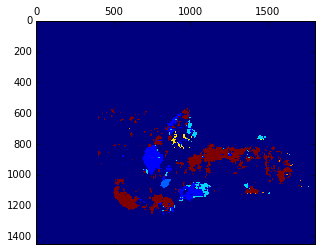

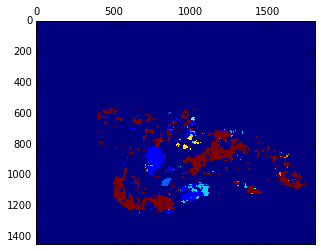

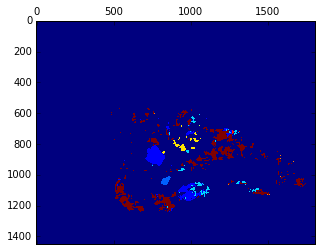

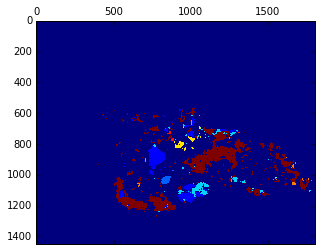

In [12]:
for i in range(first, last+1):
    plt.figure();
    plt.matshow(volume[:,:,factor*i]);
    plt.show();

In [43]:
volume_dir = '/oasis/projects/nsf/csd395/yuncong/CSHL_volumes/'
if not os.path.exists(volume_dir):
    os.makedirs(volume_dir)

In [44]:
volume[volume < 1e-6] = 0
xs, ys, zs = np.where(volume > 0)

xmin = xs.min()
xmax = xs.max()
ymin = ys.min()
ymax = ys.max()
zmin = zs.min()
zmax = zs.max()

print xmin, xmax
print ymin, ymax
print zmin, zmax

567 1270
399 1777
853 906


In [45]:
np.savez_compressed(os.path.join(volume_dir, 'volume_'+stack), volume[xmin:xmax+1, ymin:ymax+1, zmin:zmax+1])